In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/humerus/train/"
testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/wrist/validation/"


print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 1019 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [7]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [9]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 35,
    validation_data= validation_gen,
)

Epoch 1/35
32/32 [==============================] - 21s 670ms/step - loss: 0.8439 - acc: 0.6202 - val_loss: 0.6860 - val_acc: 0.6403
Epoch 2/35
32/32 [==============================] - 17s 528ms/step - loss: 0.5068 - acc: 0.7625 - val_loss: 0.6787 - val_acc: 0.7312
Epoch 3/35
32/32 [==============================] - 17s 536ms/step - loss: 0.4522 - acc: 0.7949 - val_loss: 0.6362 - val_acc: 0.7273
Epoch 4/35
32/32 [==============================] - 17s 518ms/step - loss: 0.3485 - acc: 0.8400 - val_loss: 0.6631 - val_acc: 0.7273
Epoch 5/35
32/32 [==============================] - 17s 520ms/step - loss: 0.3149 - acc: 0.8763 - val_loss: 0.7806 - val_acc: 0.7233
Epoch 6/35
32/32 [==============================] - 17s 542ms/step - loss: 0.2491 - acc: 0.8989 - val_loss: 1.0273 - val_acc: 0.7036
Epoch 7/35
32/32 [==============================] - 17s 526ms/step - loss: 0.2067 - acc: 0.9156 - val_loss: 0.9444 - val_acc: 0.7352
Epoch 8/35
32/32 [==============================] - 17s 532ms/step - 

In [10]:
import matplotlib.pyplot as plt

        loss       acc  val_loss   val_acc
0   0.843933  0.620216  0.685950  0.640316
1   0.506797  0.762512  0.678683  0.731225
2   0.452218  0.794897  0.636246  0.727273
3   0.348497  0.840039  0.663063  0.727273
4   0.314856  0.876349  0.780622  0.723320
5   0.249085  0.898921  1.027343  0.703557
6   0.206743  0.915604  0.944424  0.735178
7   0.199062  0.924436  0.935890  0.731225
8   0.244708  0.914622  1.041825  0.699605
9   0.184449  0.926398  1.449204  0.750988
10  0.186628  0.930324  1.167513  0.758893
11  0.160752  0.938175  1.715471  0.707510
12  0.197245  0.926398  1.238789  0.758893
13  0.225428  0.925417  1.211245  0.699605
14  0.210983  0.915604  1.530219  0.743083
15  0.151039  0.947007  1.172572  0.719368
16  0.136995  0.950932  1.180772  0.727273
17  0.097235  0.962709  1.470586  0.731225
18  0.078509  0.964671  1.509930  0.743083
19  0.083388  0.977429  1.885144  0.758893
20  0.092535  0.969578  2.047646  0.703557
21  0.090566  0.966634  1.421225  0.739130
22  0.09031

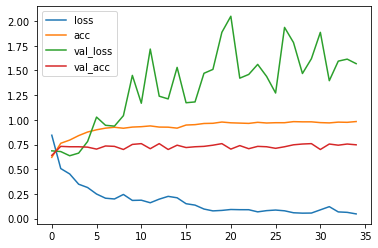

In [11]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [12]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [13]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [14]:
humerus_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_WRIST")

In [15]:
humerus_testing

,patient_id,number_of_images,actual_diagnosis,prediction_negative_array,prediction_positive_array,predicted_diagnosis
0,patient11185,4,positive,"[0.000259642, 0.96477306, 0.996227, 1.3102375e...","[0.9997403, 0.035226937, 0.003773, 0.9999999]",positive
1,patient11186,2,positive,"[6.763572e-06, 0.35489228]","[0.9999932, 0.64510775]",positive
2,patient11186,3,positive,"[5.2506194e-19, 8.270224e-06, 0.002860927]","[1.0, 0.9999918, 0.9971391]",positive
3,patient11186,3,positive,"[3.5186959e-31, 8.0362696e-08, 1.9458135e-22]","[1.0, 0.9999999, 1.0]",positive
4,patient11187,1,positive,[0.9999987],[1.3148281e-06],negative
...,...,...,...,...,...,...
232,patient11387,3,negative,"[0.008364819, 0.00059069775, 0.99956113]","[0.9916352, 0.9994093, 0.000438893]",positive
233,patient11388,3,negative,"[0.00091543235, 0.00023439938, 8.9524775e-08]","[0.9990846, 0.9997656, 0.9999999]",positive
234,patient11389,3,negative,"[0.00062475965, 0.032590736, 9.7257755e-05]","[0.9993753, 0.96740925, 0.9999027]",positive
235,patient11390,4,negative,"[0.96135247, 0.00025357766, 0.00023648572, 0.0...","[0.038647532, 0.9997464, 0.99976355, 0.99986327]",positive


In [18]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = humerus_testing
cnt = 0
for i in range(237):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/237)*100)

Accuracy : 47.257383966244724


In [19]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(153):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [20]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 90
True Negative : 11
False Positive : 45
False Negative : 7


In [21]:
model.save_weights('humerus_model.h5')